<a href="https://colab.research.google.com/github/singwang-cn/Hajimeteno_pr/blob/master/ex5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut

# Preparation for data set

In [0]:
def load_image(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_image, num_row, num_col = struct.unpack_from('>iiii', data, 0)
  offset = 16
  image_list = []
  for i in range(num_image):
    image = np.array(struct.unpack_from('>'+str(num_row*num_col)+'B', data, offset)).reshape(num_row,num_col)
    image_list.append(image)
    offset += int(num_row*num_col)
  return image_list

def load_label(datafile=''):
  path = '/content/drive/My Drive/Dataset/mnist dataset/'+datafile
  data = open(path, 'rb').read()
  magic_number, num_label = struct.unpack_from('>ii', data, 0)
  offset = 8
  label_list = []
  for i in range(num_label):
    label = struct.unpack_from('>B', data, offset)
    label_list.append(label[0])
    offset += 1
  return label_list
image_train = load_image('train-images.idx3-ubyte')
label_train = load_label('train-labels.idx1-ubyte')
image_test = load_image('t10k-images.idx3-ubyte')
label_test = load_label('t10k-labels.idx1-ubyte')

In [0]:
class image_with_label():
  def __init__(self, image, label):
    self.image = image
    self.label = label
  def show(self):
    plt.imshow(self.image)
    print("Label: {}".format(self.label))

data_train = [image_with_label(image_train[i],label_train[i]) for i in range(len(image_train))]
data_test = [image_with_label(image_test[i],label_test[i]) for i in range(len(image_test))]

# Implement of k nearest neighbors method

In [0]:
def k_nearest_neighbor(in_image, template, k=1):
  vote_to_classes = [0 for i in range(10)]
  distance_of_all = [[sum(np.square(template[i].image.flatten() - in_image.flatten())),i] for i in range(len(template))]
  class_iterator = 0

  sorted_distance = sorted(distance_of_all, key=lambda x:x[0])

  for i in range(k):
    vote_to_classes[template[sorted_distance[i][1]].label] += 1
  print("The result of vote:")


  result_vote = {str(i):[vote_to_classes[i]] for i in range(10)}
  print(pd.DataFrame(result_vote))
  result = vote_to_classes.index(max(vote_to_classes))
  print("The result is:")
  return result

comfirm whether knn works, and the state of vote can be seen here


In [0]:
k_nearest_neighbor(image_test[666], data_train, 1000)

The result of vote:
   0  1  2  3   4  5  6    7  8    9
0  0  2  0  1  39  0  0  683  0  275
The result is:


7

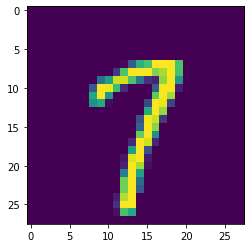

In [0]:
plt.imshow(image_test[666])

# Find the best k in k-nearest neighbors method

In [0]:
vector_image_train = [x.flatten() for x in image_train]
vector_image_test = [x.flatten() for x in image_test]
dataframe_train = pd.DataFrame(vector_image_train)
dataframe_train['label'] = label_train
dataframe_test = pd.DataFrame(vector_image_test)
dataframe_test['label'] = label_test
g_0,g_1,g_2,g_3,g_4,g_5,g_6,g_7,g_8,g_9 = dataframe_train.groupby('label')
mini_train = g_0[1].sample(n = 650).append([g_1[1].sample(n = 650),g_2[1].sample(n = 650),g_3[1].sample(n = 650),
         g_4[1].sample(n = 650),g_5[1].sample(n = 650),g_6[1].sample(n = 650),
         g_7[1].sample(n = 650),g_8[1].sample(n = 650),g_9[1].sample(n = 650)])
mini_test = dataframe_test.sample(n = 650)

In [0]:
mini_train_label = np.array(mini_train['label'].tolist())
mini_train_image = mini_train.drop(columns = ['label']).values
mini_test_label = np.array(mini_test['label'].tolist())
mini_test_image = mini_test.drop(columns = ['label']).values

# Test with minist data set
650 tainning data are taken from each segment of data set with differet labels. The other 650 test data are prepared for this test which use hold out method.


In [0]:
k_list = [i for i in range(22) if i%2!=0]
error_rate = []
for k in k_list:
  error = 0
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(mini_train_image,mini_train_label)
  predicted_label = knn.predict(mini_test_image)
  for i in range(len(predicted_label)):
    if predicted_label[i] != mini_test_label[i]: error += 1
  error_rate.append(error/mini_test_image.shape[0])

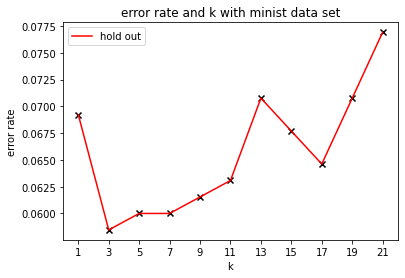

In [0]:
plt.figure("error rate and k with minist data set")
plt.title("error rate and k with minist data set")
plt.plot(k_list, error_rate, color='red', label='hold out')
plt.scatter(k_list, error_rate, marker='x', color='black')
plt.xlabel('k')
plt.xticks(k_list)
plt.ylabel('error rate')
plt.legend()

like the chart indicating, the error rate is lowest when k=3 in this data set. I did not use LOO method to do a test because it will spend a lot of time.

# Test with Pima Indians Diabetes Database

In [0]:
data_path = '/content/drive/My Drive/Dataset/diabetes.csv'
pima = pd.read_csv(data_path)
pima_tr = pima.sample(n = 200, replace = False)
pima_te = pima.sample(n = 332)
pima_co = pima_tr.append(pima_te)

In [0]:
pima_data = pima.drop(columns=['Outcome'])
pima_tr_label = np.array(pima_tr['Outcome'].tolist())
pima_tr_nolabel = pima_tr.drop(columns = ['Outcome'])
pima_tr_data = ((pima_tr_nolabel-pima_data.mean())/pima_data.std()).values
pima_te_label = np.array(pima_te['Outcome'].tolist())
pima_te_nolabel = pima_te.drop(columns = ['Outcome'])
pima_te_data = ((pima_te_nolabel-pima_data.mean())/pima_data.std()).values
pima_co_label = np.array(pima_co['Outcome'].tolist())
pima_co_nolabel = pima_co.drop(columns = ['Outcome'])
pima_co_data = ((pima_co_nolabel-pima_data.mean())/pima_data.std()).values

The test used hold-out method with 200 training data and 332 test data

In [0]:
k_list1 = [i for i in range(122) if i%2!=0]
error_rate1 = []
for k in k_list1:
  error = 0
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(pima_tr_data,pima_tr_label)
  predicted_label = knn.predict(pima_te_data)
  for i in range(len(predicted_label)):
    if predicted_label[i] != pima_te_label[i]: error += 1
  error_rate1.append(error/mini_test_image.shape[0])

The test used leave-one-out method with the same data set


In [0]:
loo = LeaveOneOut()
error_rate2 = []
for k in k_list1:
  error = 0
  knn = KNeighborsClassifier(n_neighbors=k)
  for i_tr, i_te in loo.split(pima_co_data):
    knn.fit(pima_co_data[i_tr],pima_co_label[i_tr])
    if knn.predict(pima_co_data[i_te]) != pima_co_label[i_te]:
      error += 1
  error_rate2.append(error/pima_co_data.shape[0])

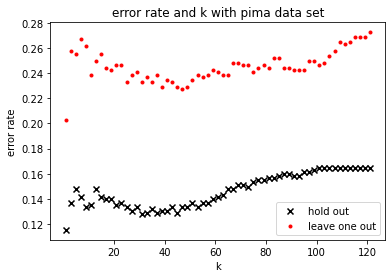

In [0]:
plt.figure("error rate and k with pima data set")
plt.title("error rate and k with pima data set")
plt.scatter(k_list1, error_rate1, marker='x', color='black', label='hold out')
plt.scatter(k_list1, error_rate2, marker='.', color='red', label='leave one out')
plt.xlabel('k')
plt.xticks([20,40,60,80,100,120])
plt.ylabel('error rate')
plt.legend()

There is a problem: the chart did not appear with the same phenomenon as that on text book, and it seems like that there are not any apparent difference between by using two test methods.